# Homework4
## Ying Cheng  
## 6623516397

## 1. The LASSO and Boosting for Regression

## (a)&(b):
## (a) Download the Communities and Crime data1 from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.
## (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer

data=pd.read_csv("communities.csv",sep=',', header=None)
# print(data)
str_col=data[3]
# print(str_col)

for i in np.arange(0,128,1):
    data[i]=pd.to_numeric(data[i],errors='coerce')
# print(data)
data[3]=data[3].replace("NaN",1)
# print(data)

imp=Imputer(missing_values='NaN', strategy='mean')
imp.fit(data)
dataset=pd.DataFrame(imp.transform(data))
dataset[3]=str_col
# print(dataset)

##remove the features that can not predict
dataset_re=dataset[np.arange(5,128,1)]
print(dataset_re)

training_set=pd.DataFrame(dataset_re.loc[:1494])
# print(training_set)
test_set=pd.DataFrame(dataset_re.loc[1495:])
# print(test_set)


       5     6     7     8     9     10    11    12    13    14   ...    118  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...   0.12   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...   0.02   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...   0.01   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...   0.02   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...   0.04   
5     0.02  0.28  0.06  0.54  1.00  0.25  0.31  0.48  0.27  0.37  ...   0.01   
6     0.01  0.39  0.00  0.98  0.06  0.02  0.30  0.37  0.23  0.60  ...   0.05   
7     0.01  0.74  0.03  0.46  0.20  1.00  0.52  0.55  0.36  0.35  ...   0.01   
8     0.03  0.34  0.20  0.84  0.02  0.00  0.38  0.45  0.28  0.48  ...   0.04   
9     0.01  0.40  0.06  0.87  0.30  0.03  0.90  0.82  0.80  0.39  ...   0.00   
10    0.13  0.71  0.15  0.07  1.00  0.41  0.40  0.52  0.35  0.33  ...   0.02   
11    0.02  0.46  0.08  0.91  0.07  0.10

## (c) Plot a correlation matrix for the features in the data set.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# dataset_re.describe()
dataset_re[np.arange(5,127,1)].corr()
ax=sns.heatmap(dataset_re[np.arange(5,127,1)].corr())


## (d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m , in which s is sample variance and m is sample mean.

In [3]:
from scipy.stats import variation 
s=dataset_re[np.arange(5,127,1)].var()
m=dataset_re[np.arange(5,127,1)].mean()
CV=s/m
print(CV)
# print(type(CV))
# print(dataset_re)

5      0.279637
6      0.057841
7      0.357587
8      0.079015
9      0.283898
10     0.375306
11     0.056777
12     0.041733
13     0.082446
14     0.075875
15     0.256736
16     0.284167
17     0.121379
18     0.059942
19     0.142881
20     0.063970
21     0.063981
22     0.155280
23     0.058587
24     0.104626
25     0.104275
26     0.094813
27     0.101149
28     0.133416
29     0.118457
30     0.128067
31     0.086773
32     0.294900
33     0.172265
34     0.144146
         ...   
97     0.068567
98     0.061468
99     0.064188
100    0.060307
101    0.043774
102    0.018767
103    0.003018
104    0.015571
105    0.042694
106    0.020093
107    0.018053
108    0.018767
109    0.011906
110    0.010760
111    0.040401
112    0.045539
113    0.071802
114    0.031347
115    0.030490
116    0.011846
117    0.026843
118    0.183676
119    0.177134
120    0.324496
121    0.045127
122    0.040890
123    0.010454
124    0.059659
125    0.614103
126    0.022192
dtype: float64


## (e) Pick square root (128) floor features with highest CV and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?
## Answer: I can not draw conclusions just by the scatter plots.

[125, 95, 10, 94, 7, 54, 120, 66, 62, 61, 63]


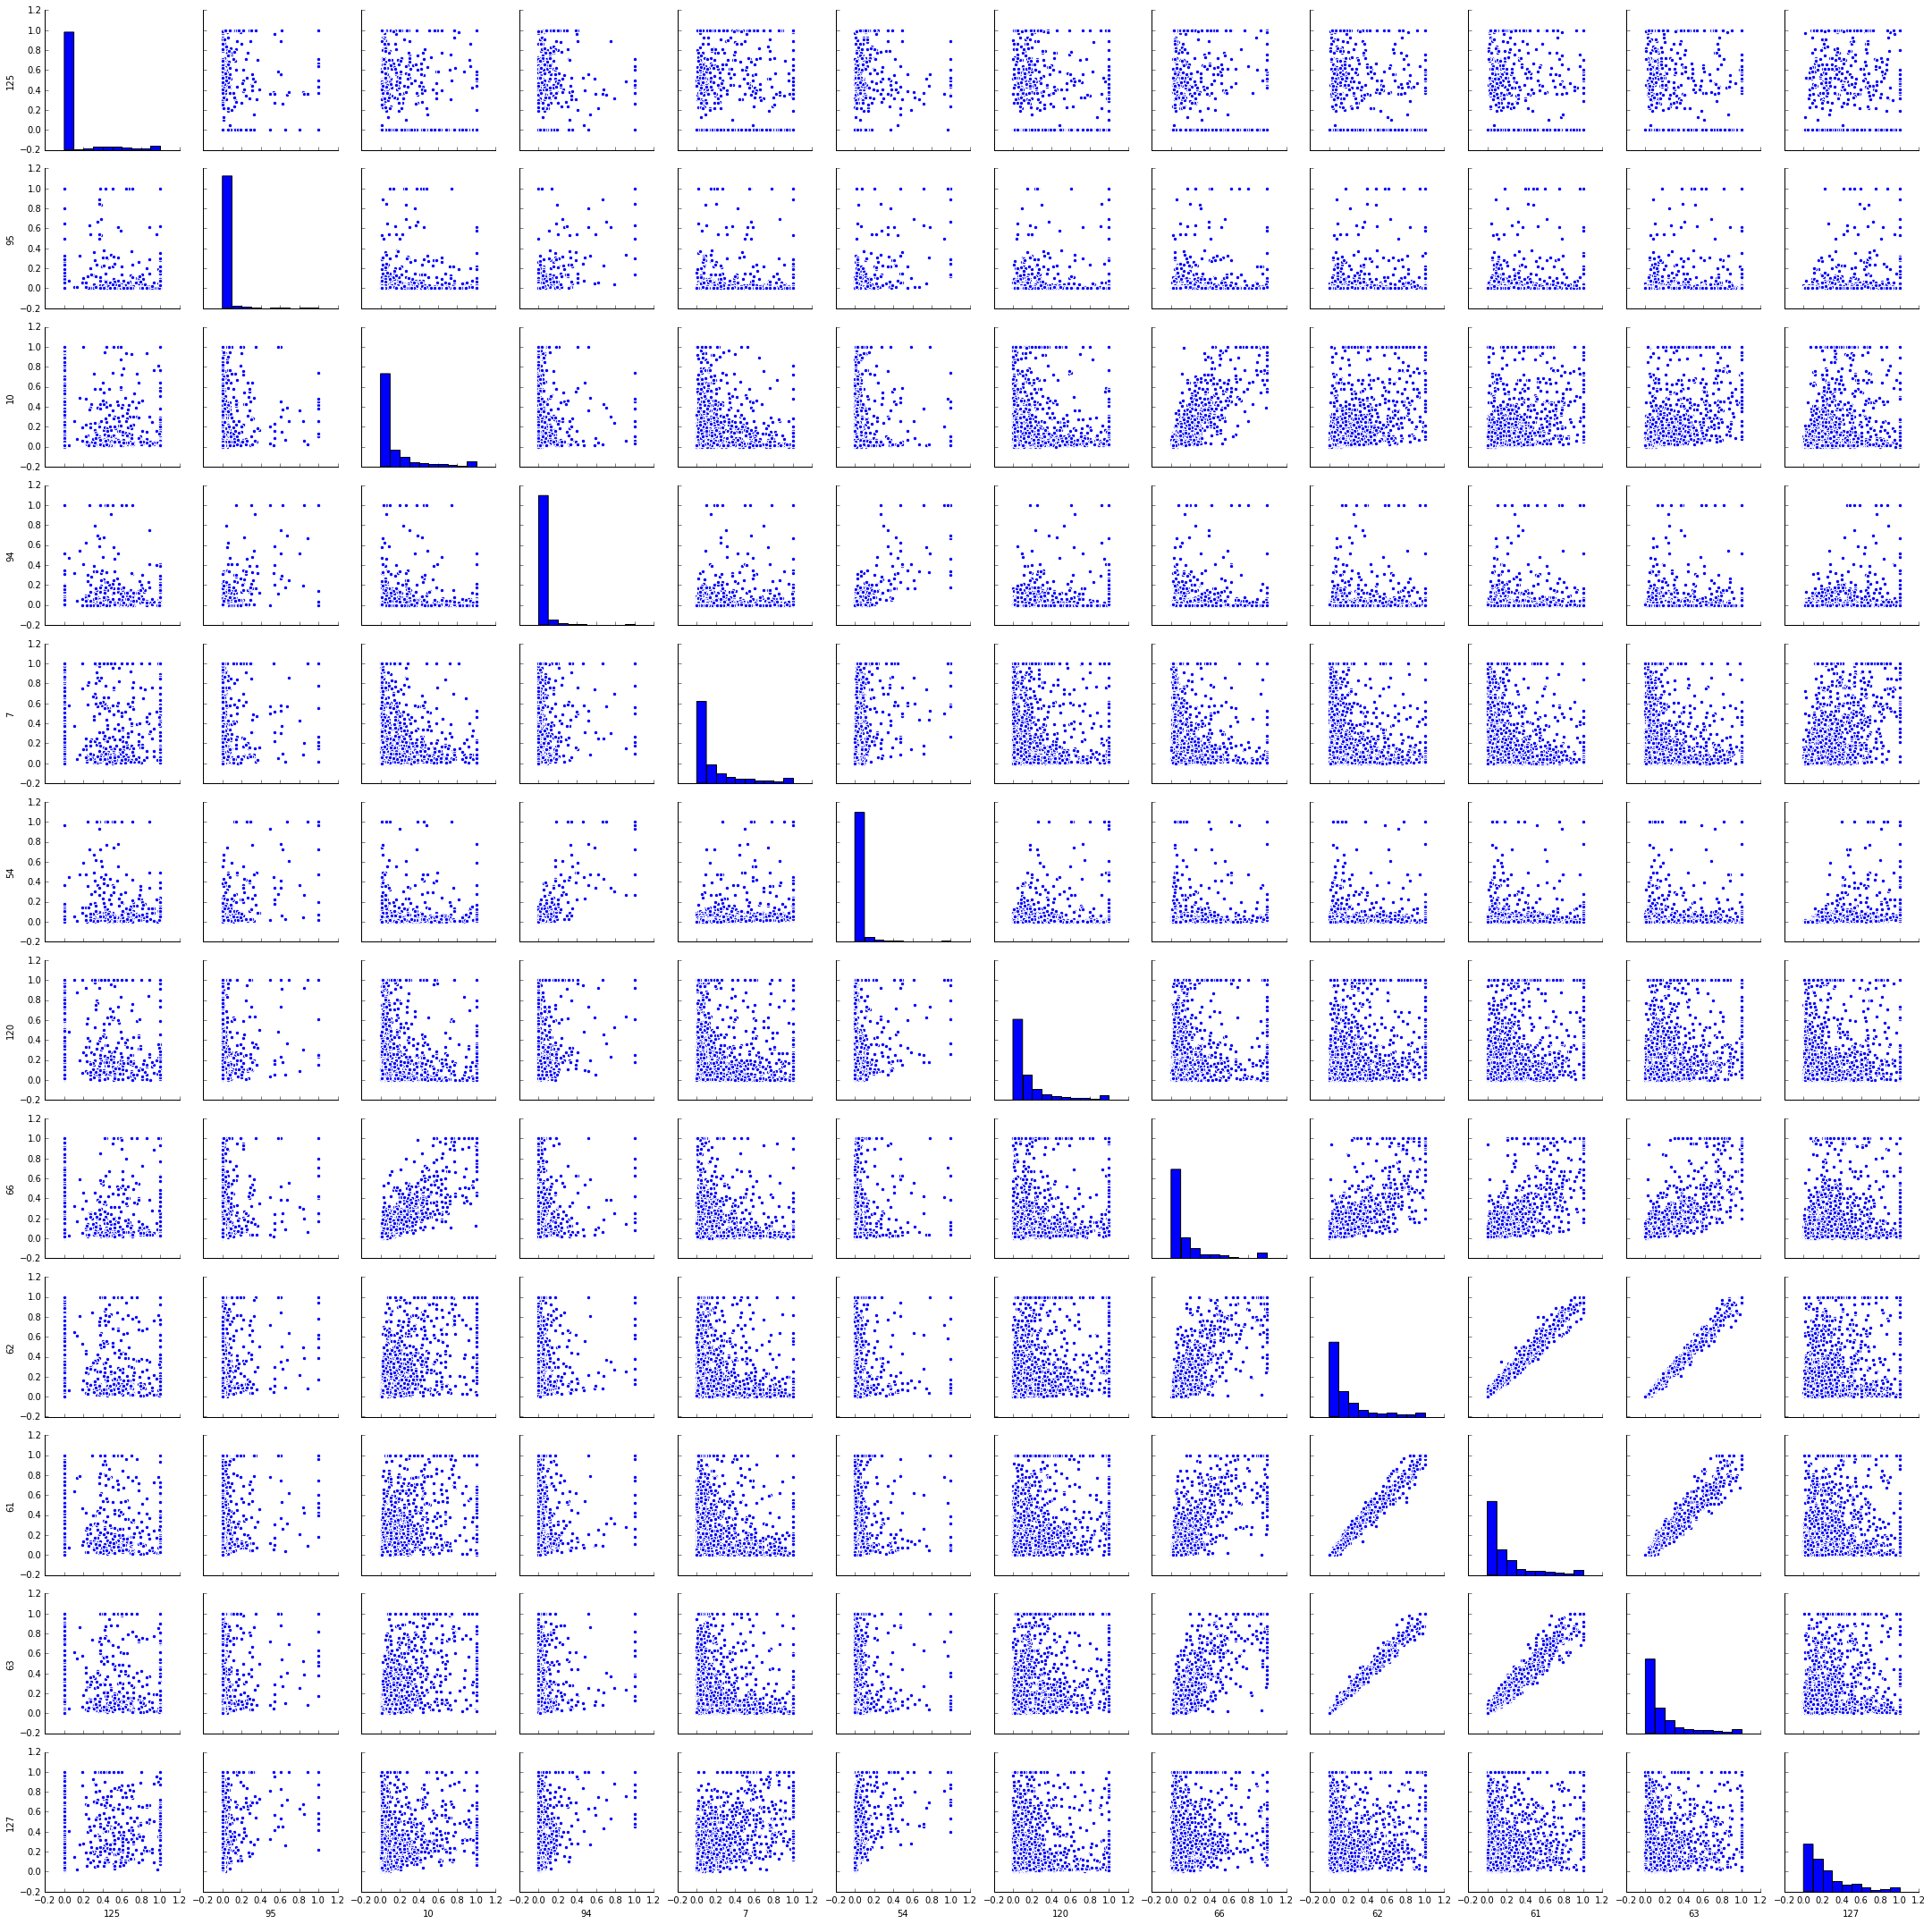

In [4]:
import math

sort_CV=CV.sort_values(ascending=False)
# print(sort_CV)
sel_row=sort_CV[0:math.floor(math.sqrt(128))]
sel_index=sel_row.index.tolist()
# print(sel_row)
print(sel_index)
sel_index.append(127)

dataset_highCV=dataset_re[sel_index]
# print(dataset_re.icol(122))
# dataset_highCV['target']=dataset_re.icol(122)
# print(dataset_highCV)  

sns.pairplot(dataset_highCV, kind='scatter')
plt.show()

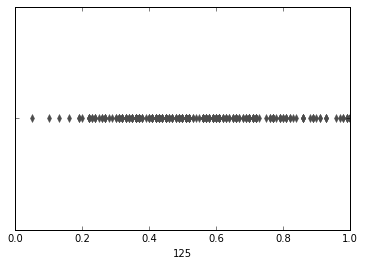

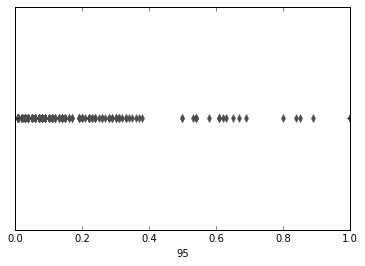

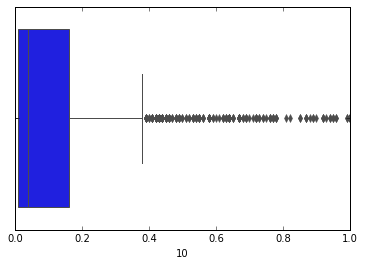

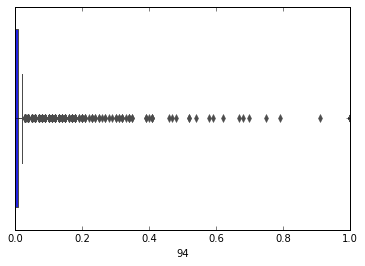

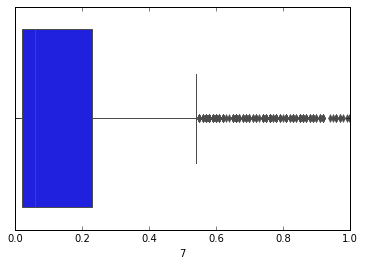

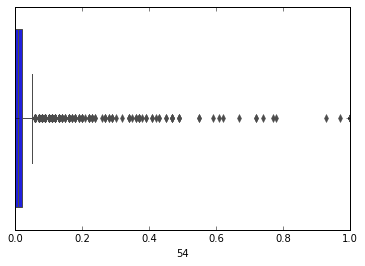

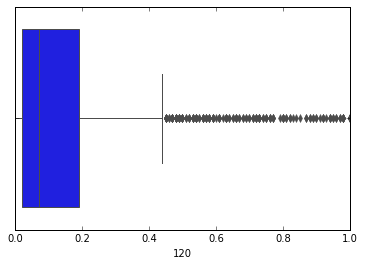

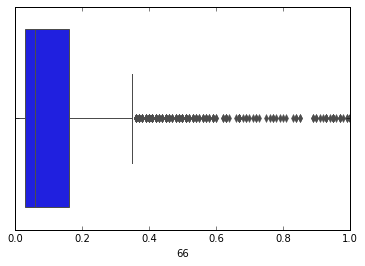

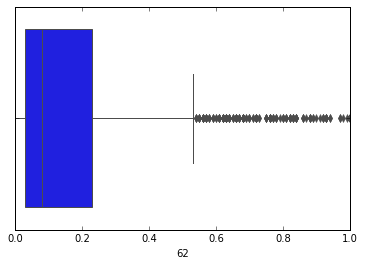

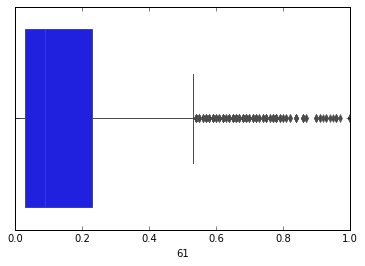

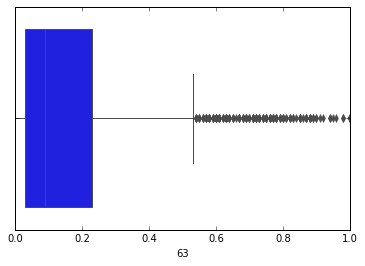

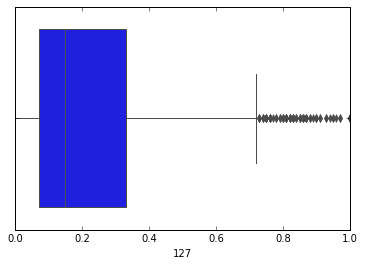

In [5]:
for i in sel_index:
#     print (i)
    sns.boxplot(dataset_re[i])
    plt.show()



## (f) Fit a linear model using least squares to the training set and report the test error.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# m=np.arange(5,127,1)
# print(m)
# print(training_set)
x_training_set=training_set[np.arange(5,127,1)]
y_training_set=training_set[127]
x_test_set=test_set[np.arange(5,127,1)]
y_test_set=test_set[127]
# print(x_training_set)

reg=LinearRegression()
reg.fit(x_training_set,y_training_set)
prediction=reg.predict(x_test_set)
error = (y_test_set!=prediction).sum()
error_rate=error/len(prediction)
print("test error is:",error_rate)
mse_f=mean_squared_error(y_test_set,prediction)
print("MSE is:",mse_f)



## (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

lam_range_g=[0.001,0.01,0.1,1,10,100]

lam_scores_g=[]
for lam in lam_range_g:
    ridge = Ridge(alpha=1/lam)
#     ridge.fit(x_training_set,y_training_set)
    scores = cross_val_score(ridge, x_training_set, y_training_set, cv=10, scoring=None)
    lam_scores_g.append(scores.mean())
print(lam_scores_g)

best_lam_g=lam_range_g[lam_scores_g.index(max(lam_scores_g))]
print("The best lambda chosen by cross-validation is: ",best_lam_g)

[0.45338535860038637, 0.6365827806963901, 0.6598234707881188, 0.6617313098797609, 0.6517316222997988, 0.6427286664130273]
The best lambda chosen by cross-validation is:  1


In [8]:
####using the best lambda chosen by cross-validation

ridge_g=Ridge(alpha=1/best_lam_g)
ridge_g.fit(x_training_set,y_training_set)
prediction_g=ridge_g.predict(x_test_set)
test_error_g=ridge_g.score(x_test_set,y_test_set)
print("test error is:",test_error_g)
mse_g=mean_squared_error(y_test_set,prediction_g)
print("mse is:",mse_g)

test error is: 0.627021995706937
mse is: 0.01773708110430369


## (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with normalized features. Report the test error for both cases and compare them.
## Answer: the test error for both cases are almost the same

In [9]:
from sklearn import linear_model

lam_range_h=[0.001,0.01,0.1,1,10,100,1000,10000]

lam_scores_h=[]
for lam in lam_range_h:
    lasso = linear_model.Lasso(alpha=1/lam)
#     ridge.fit(x_training_set,y_training_set)
    scores = cross_val_score(lasso, x_training_set, y_training_set, cv=10)
    lam_scores_h.append(scores.mean())
print(lam_scores_h)

best_lam_h=lam_range_h[lam_scores_h.index(max(lam_scores_h))]
print("The best lambda chosen by cross-validation is: ",best_lam_h)

[-0.005362908819538781, -0.005362908819538781, -0.005362908819538781, -0.005362908819538781, -0.005362908819538781, 0.5643048863836844, 0.6534758492387533, 0.6622586050864226]
The best lambda chosen by cross-validation is:  10000


In [10]:
####using the best lambda chosen by cross-validation
# print(best_lam_h)
lasso_h=linear_model.Lasso(alpha=1/best_lam_h)
lasso_h.fit(x_training_set,y_training_set)
prediction_h=lasso_h.predict(x_test_set)
test_error_h=lasso_h.score(x_test_set,y_test_set)
# print(x_test_set)

coef=lasso_h.coef_ 
sel_coef=[]
# print(pd.DataFrame(coef))
# print(np.arange(0,122,1))

for i in np.arange(0,122,1):
    if coef[i]!=0:
        sel_coef.append(i+5)
print("The indext of the selected features is:", sel_coef)

print("test error is:",test_error_h)
mse_h=mean_squared_error(y_test_set,prediction_h)
print("mse is:", mse_h)

The indext of the selected features is: [7, 9, 11, 12, 14, 16, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 33, 34, 36, 38, 39, 41, 43, 44, 45, 49, 50, 51, 53, 54, 55, 56, 60, 64, 66, 68, 69, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 87, 90, 91, 92, 93, 94, 95, 96, 99, 104, 105, 107, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125]
test error is: 0.6259053074097356
mse is: 0.01779018555193252


In [11]:
n_lasso_h=linear_model.Lasso(alpha=1/best_lam_h,normalize=True)
n_lasso_h.fit(x_training_set,y_training_set)
n_test_error_h=n_lasso_h.score(x_test_set,y_test_set)
# print(x_test_set)

print("test error is using normalized:",n_test_error_h)

test error is using normalized: 0.6329119011993098


## (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn import model_selection

regr_i = LinearRegression()
m_range=np.arange(1,123,1)
# print(m_range)

m_scores_i=[]
for m in m_range:
    pca = PCA(n_components=m)
    pca.fit(x_training_set)
    X = pca.transform(x_training_set)
#     Y = pca.transform(y_training_set)
    scores = cross_val_score(regr_i, X, y_training_set, cv=10)
    m_scores_i.append(scores.mean())
    
print(m_scores_i)
best_m_i=m_range[m_scores_i.index(max(m_scores_i))]
print("The best m chosen by cross-validation is: ",best_m_i)

[0.3277932415233568, 0.4559107414442776, 0.5094516973603931, 0.5675183215059025, 0.5897645126988894, 0.5979726089963291, 0.6433486527044148, 0.6424161491417317, 0.6437607265322262, 0.6451286823175909, 0.6450230684688638, 0.6442634739703659, 0.645864800068581, 0.6455687761445615, 0.6454684569201811, 0.6452295496051507, 0.6448932776843916, 0.6442091322935972, 0.6437969787325267, 0.6425632278305895, 0.6422475188931166, 0.6426831560427747, 0.6460521686461775, 0.646777240276374, 0.6453023409447772, 0.6449996272189801, 0.6455528727394796, 0.6466794096266247, 0.6463091580963477, 0.648543500620479, 0.6476842682470424, 0.647143327979527, 0.647246566824607, 0.646428377906201, 0.646496558412595, 0.646209730683729, 0.6465165413241757, 0.6459295725910125, 0.6479290971801807, 0.6470959185189729, 0.6473829462793691, 0.6479556973018736, 0.6484159211768143, 0.6486499624886247, 0.6495383848262942, 0.649386860661483, 0.6494577517965399, 0.6483953446011028, 0.6481351121832422, 0.6486736198304666, 0.648703

In [13]:
####using the best m chosen by cross-validation

# print(best_m_i)
pca_i=PCA(n_components=best_m_i)
pca_i.fit(x_training_set,y_training_set)
x_test_trans=pca_i.transform(x_test_set)
x_train_trans=pca_i.transform(x_training_set)



regr_i.fit(x_train_trans,y_training_set)


prediction = regr_i.predict(x_test_trans)
Mse=mean_squared_error(y_test_set, prediction)
print("The test error is:",Mse)




The test error is: 0.01848036523614226


## (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost2 to fit the model tree. Determine α (the regularization term) using cross-validation.

In [14]:
import xgboost as xgb
from sklearn.model_selection import KFold
x=x_training_set.values
y=y_training_set.values

alphas_j=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

MSE_J=[]
kf = KFold(n_splits=10, shuffle=True)
for alpha in alphas_j:
    temp_mse=[]
    for train_index, test_index in kf.split(x):
        xgb_model = xgb.XGBRegressor(reg_alpha=alpha).fit(x[train_index], y[train_index])
        predictions = xgb_model.predict(x[test_index])
        actuals = y[test_index]
        temp_mse.append(mean_squared_error(actuals, predictions))
#     print(np.mean(temp_mse))
    MSE_J.append(np.mean(temp_mse))
print(min(MSE_J))


best_alpha_j=alphas_j[MSE_J.index(min(MSE_J))]
print(best_alpha_j)

0.019683046268906552
1


## 2. Tree-Based Methods

## (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [15]:
test_set = pd.read_csv('aps_failure_test_set.csv', skiprows=20)
# print(test_set)
training_set=pd.read_csv('aps_failure_training_set.csv', skiprows=20)
# print(training_set)


## (b) Data Preparation
## This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea. 

## (i). Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.5

In [16]:
all_dataset=training_set.append(test_set)
# print(type(all_dataset))
all_dataset=all_dataset.replace('na', 'NaN')
# print(all_dataset)
class_col=list(all_dataset['class'])
# print(class_col)

In [17]:
###using mean to fill missing value
all_dataset['class']=1
imp=Imputer(missing_values='NaN', strategy='mean')
imp.fit(all_dataset)
all_dataset_mean=pd.DataFrame(imp.transform(all_dataset))
# print(all_dataset_mean)
all_dataset_mean=all_dataset_mean[np.arange(1,171,1)]
# all_dataset_mean['class']=1
all_dataset_mean['class']=class_col
print(all_dataset_mean)

mean_training=all_dataset_mean.loc[:59999]
mean_test=all_dataset_mean.loc[60000:]
print(mean_training)
print(mean_test)

               1        2             3              4           5  \
0        76698.0  0.72556  2.130706e+09     280.000000    0.000000   
1        33058.0  0.72556  0.000000e+00  150629.962105    0.000000   
2        41040.0  0.72556  2.280000e+02     100.000000    0.000000   
3           12.0  0.00000  7.000000e+01      66.000000    0.000000   
4        60874.0  0.72556  1.368000e+03     458.000000    0.000000   
5        38312.0  0.72556  2.130706e+09     218.000000    0.000000   
6           14.0  0.00000  6.000000e+00  150629.962105    0.000000   
7       102960.0  0.72556  2.130706e+09     116.000000    0.000000   
8        78696.0  0.72556  0.000000e+00  150629.962105    0.000000   
9       153204.0  0.00000  1.820000e+02  150629.962105    0.000000   
10       39196.0  0.72556  2.040000e+02     170.000000    0.000000   
11       45912.0  0.72556  0.000000e+00     454.000000    0.000000   
12        2104.0  0.72556  3.600000e+01      26.000000    0.000000   
13      118950.0  0.

In [18]:
###using most_frequent to fill missing value
# imp=Imputer(missing_values='NaN', strategy='most_frequent')
# imp.fit(all_dataset)
# all_dataset_mostFrequent=pd.DataFrame(imp.transform(all_dataset))
# # print(all_dataset_mean)
# all_dataset_mostFrequent=all_dataset_mostFrequent[np.arange(1,171,1)]
# all_dataset_mostFrequent['class']=class_col
# print(all_dataset_mostFrequent)

# mostFrequent_training=all_dataset_mostFrequent.loc[:59999]
# mostFrequent_test=all_dataset_mostFrequent.loc[60000:]
# print(mostFrequent_training)
# print(mostFrequent_test)

## ii. For each of the 170 features, calculate the coefficient of variation CV = s/m, where s is sample variance and m is sample mean.

In [19]:
##using mean to fill missing value

s_2=all_dataset_mean[np.arange(1,171,1)].var()
m_2=all_dataset_mean[np.arange(1,171,1)].mean()
CV_2=s_2/m_2
print(CV_2)
# print(type(CV))
# print(dataset_re)

1      1.145941e+06
2      3.442691e+00
3      1.674811e+09
4      6.436987e+09
5      3.348321e+03
6      3.592978e+03
7      1.676613e+06
8      2.133743e+06
9      3.012695e+06
10     7.175411e+06
11     1.343992e+07
12     9.863669e+06
13     9.222264e+06
14     3.961364e+06
15     1.403492e+06
16     5.438233e+06
17     9.826018e+06
18     3.286892e+06
19     2.172679e+06
20     5.989585e+06
21     5.115037e+06
22     7.994879e+06
23     1.780102e+07
24     1.574721e+07
25     9.707059e+06
26     3.657471e+06
27     5.505834e+01
28     3.207740e+06
29     2.793965e+06
30     2.222739e+06
           ...     
141    4.050748e+07
142    9.361380e+06
143    2.831092e+05
144    1.362178e+05
145    2.838210e+04
146    1.954608e+09
147    8.810251e+06
148    4.743063e+05
149    7.278929e+04
150    3.221961e+07
151    7.203224e+06
152    2.057700e+07
153    4.430140e+05
154    5.003745e+02
155    1.649652e+03
156    2.047568e+08
157    7.684063e+03
158    7.417623e+03
159    8.451306e+06


## iii. Plot a correlation matrix for your features using pandas or any other tool.

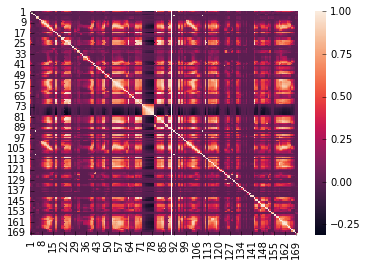

In [20]:
all_dataset_mean[np.arange(1,171,1)].corr()
corm=sns.heatmap(all_dataset_mean[np.arange(1,171,1)].corr())

## iv. Pick ⌊ 170⌋ features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

[92, 110, 4, 146, 3, 156, 135, 137, 141, 123, 150, 34, 63]


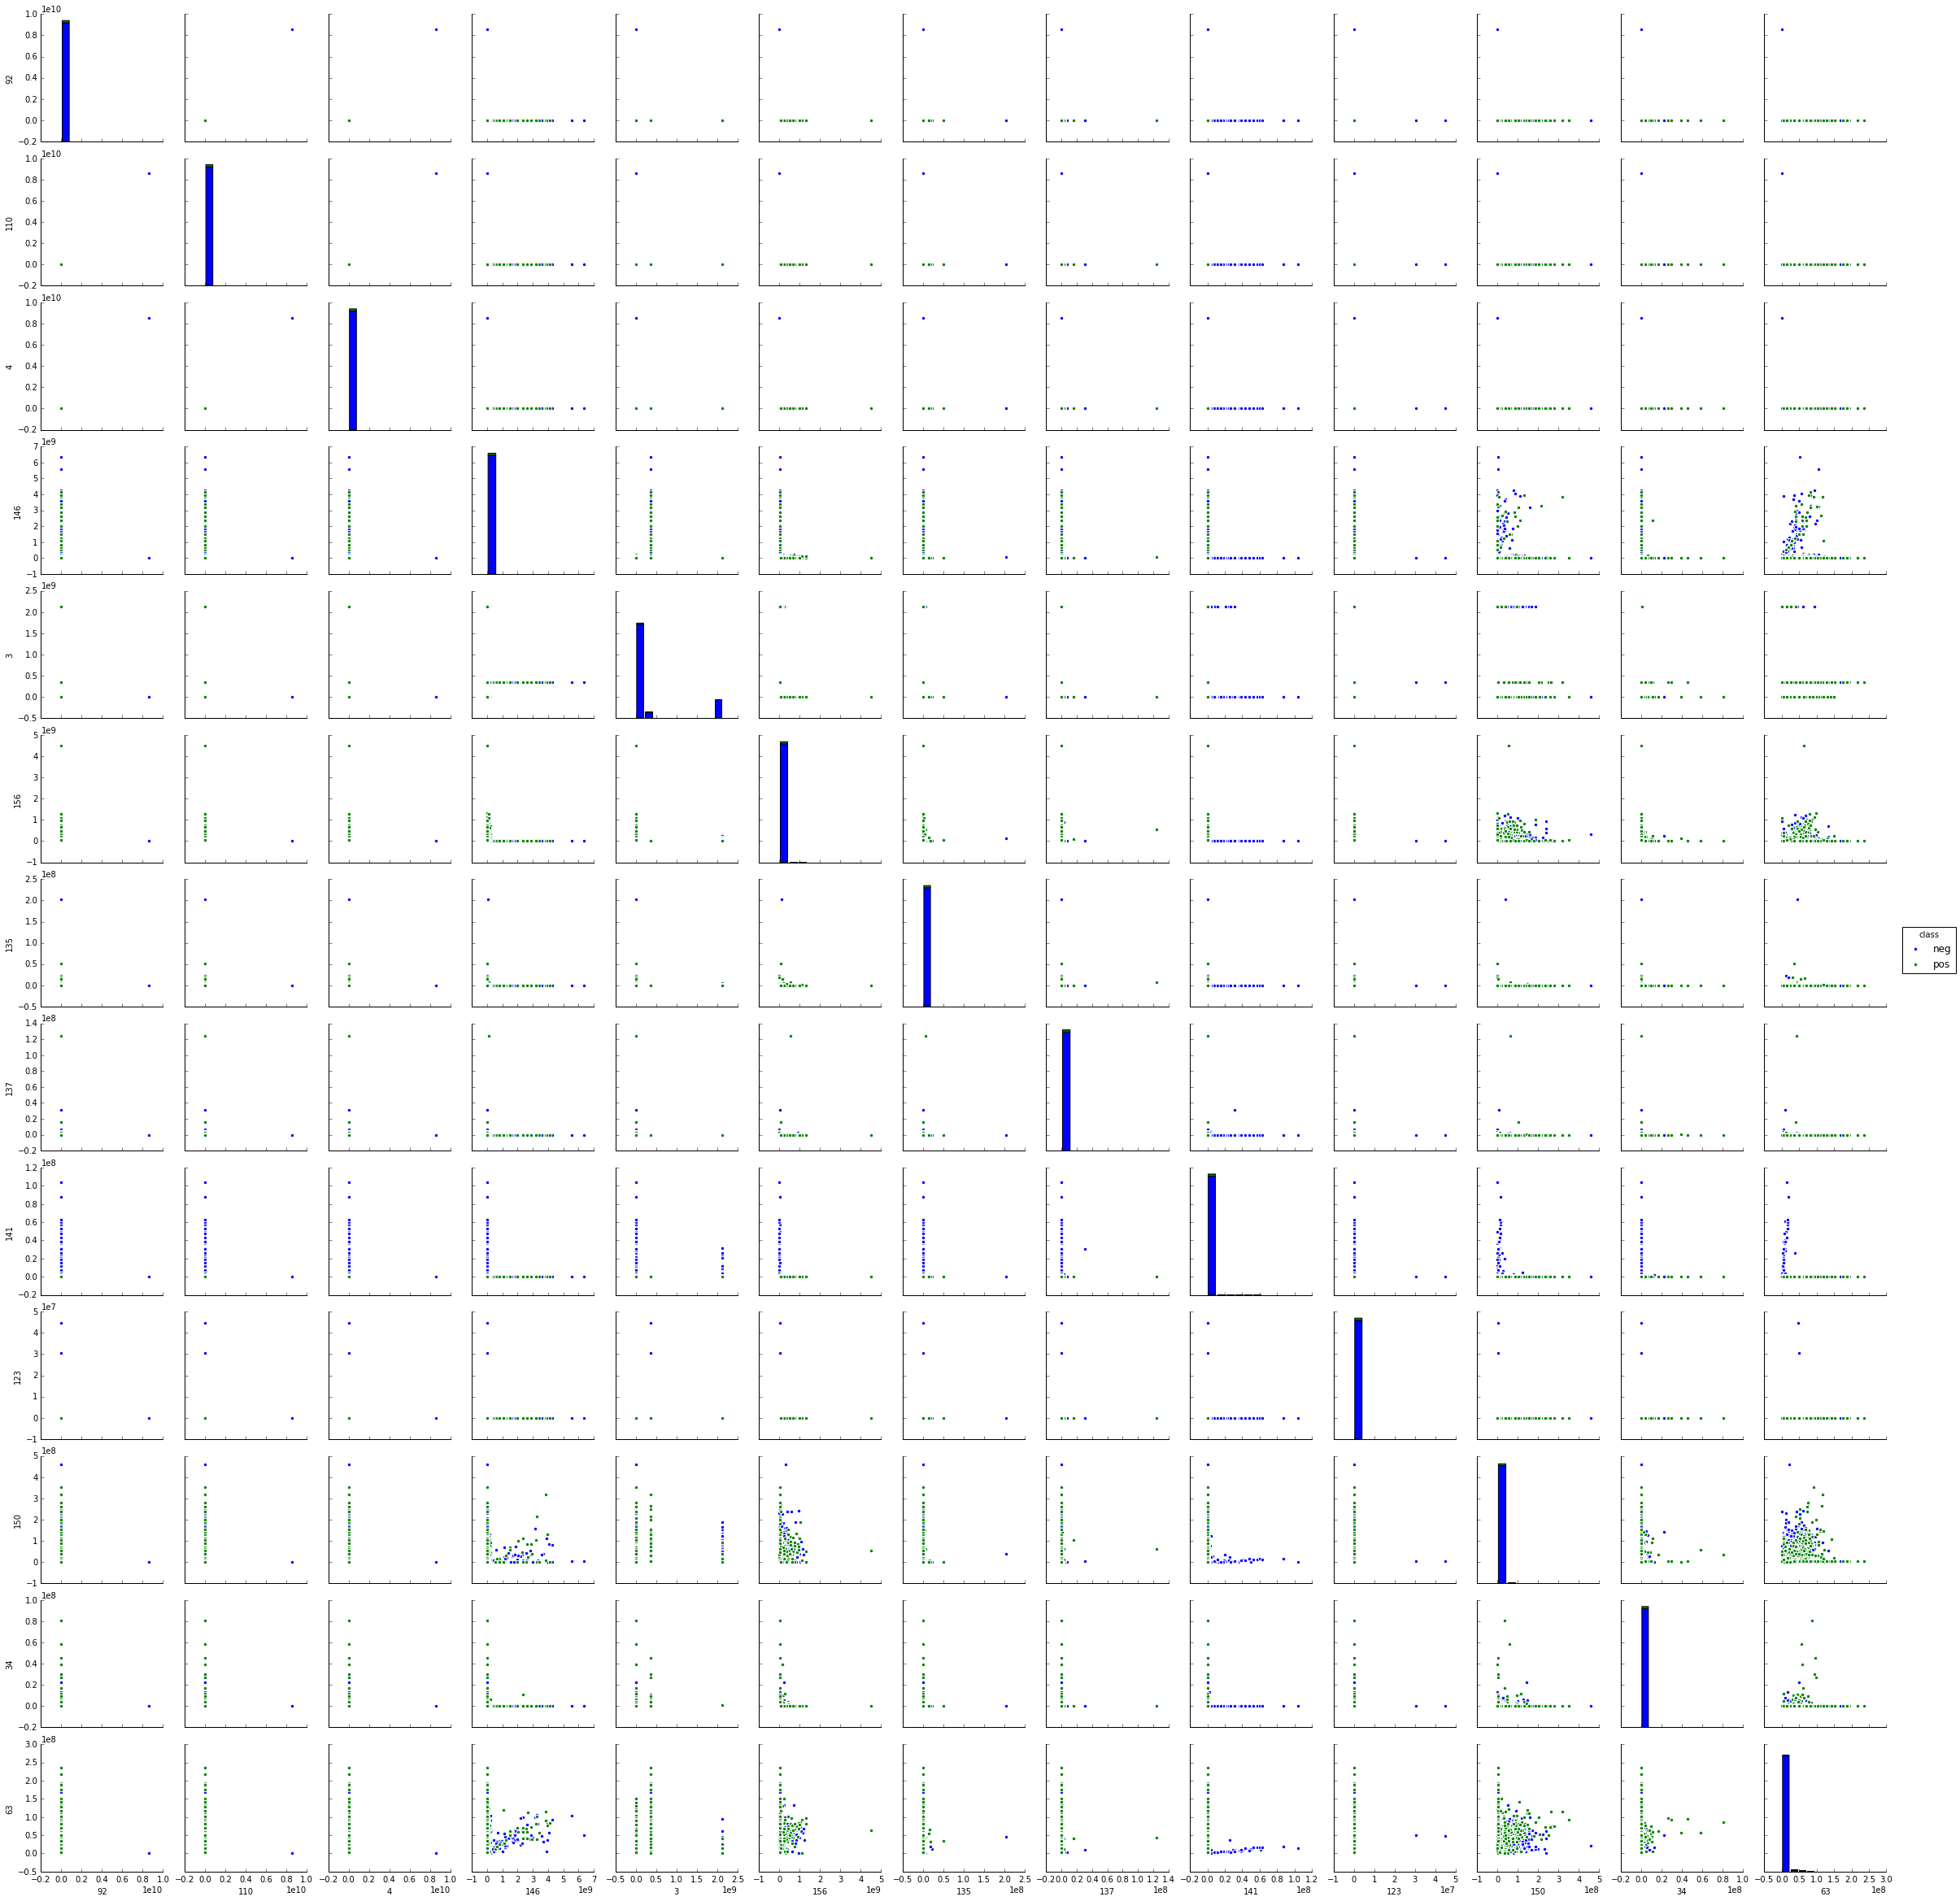

In [21]:
import math
# print(all_dataset_mean)
sort_CV_2=CV_2.sort_values(ascending=False)
# print(sort_CV)
sel_row_2=sort_CV_2[0:math.floor(math.sqrt(170))]
sel_index_2=sel_row_2.index.tolist()
# print(sel_row_2)
print(sel_index_2)
sel_index_2.append('class')
# print(sel_index_2)
dataset_highCV_2=all_dataset_mean[sel_index_2]
# dataset_highCV_2['class']=all_dataset_mean['class']
# print(dataset_highCV_2)

sns.pairplot(dataset_highCV_2, kind='scatter', hue='class')
plt.show()

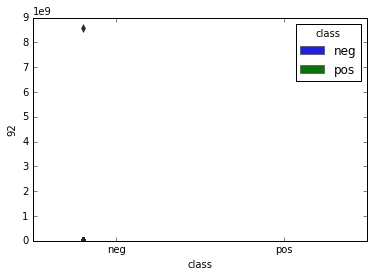

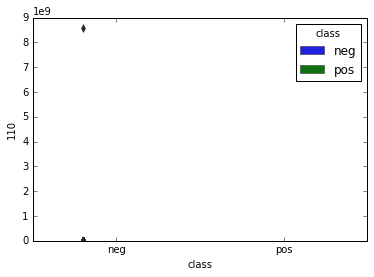

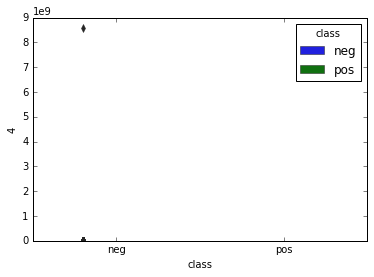

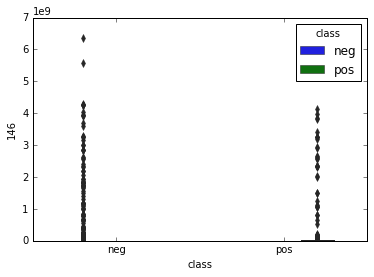

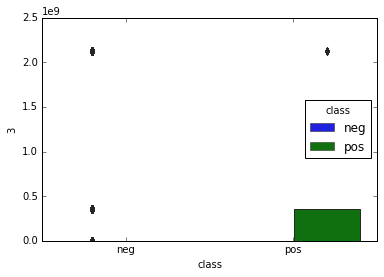

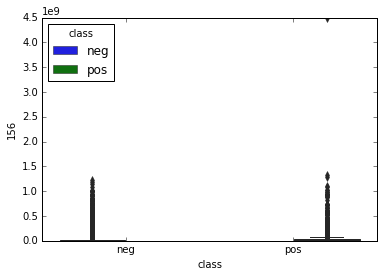

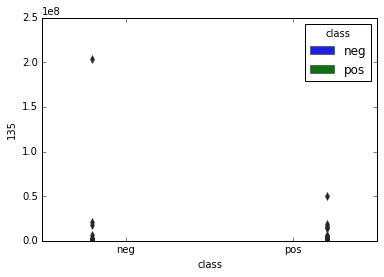

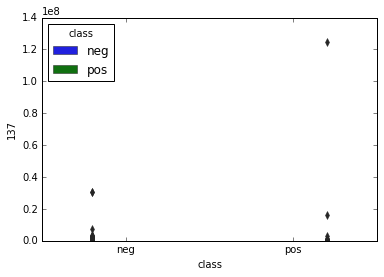

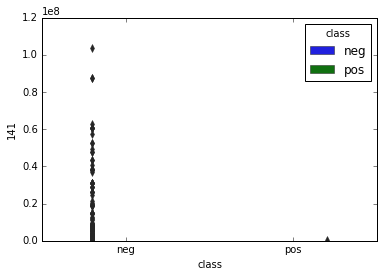

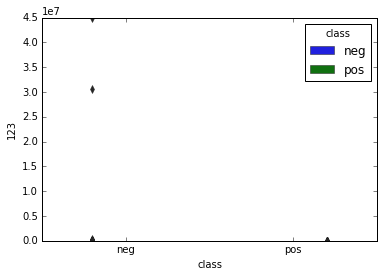

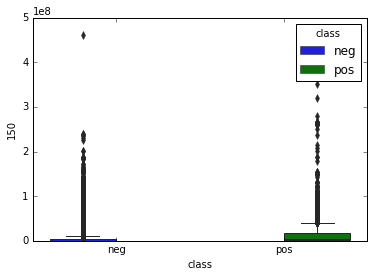

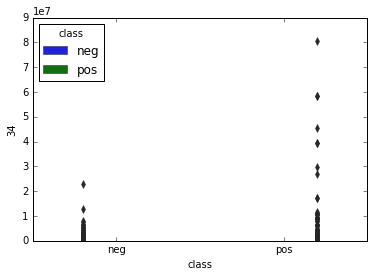

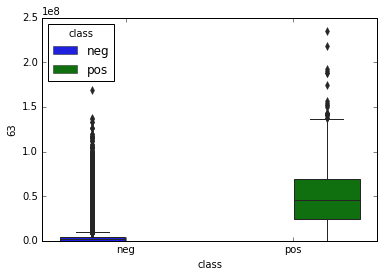

In [22]:
# print(sel_index_2)
# print(sel_index_2[0:-1])
for i in sel_index_2[0:-1]:
#     print (all_dataset_mean[i])
    sns.boxplot(all_dataset_mean['class'],y=all_dataset_mean[i],hue='class',data=dataset_highCV_2)
#     sns.boxplot(all_dataset_mean[i],hue='CLASS')
    plt.show()

## v. Determine the number of positive and negative data. Is this data set imbalanced?
## Answer: This data set is imbalanced

In [23]:
# print(class_col)
num_neg=class_col.count('neg')
num_pos=class_col.count('pos')
print("The number of negative data is:", num_neg)
print("The number of positive data is:", num_pos)


The number of negative data is: 74625
The number of positive data is: 1375


## (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

/Users/irischeng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


misclassification for training set is: 0.0139
the confusion matrix of training is:
[[  188   812]
 [   22 58978]]


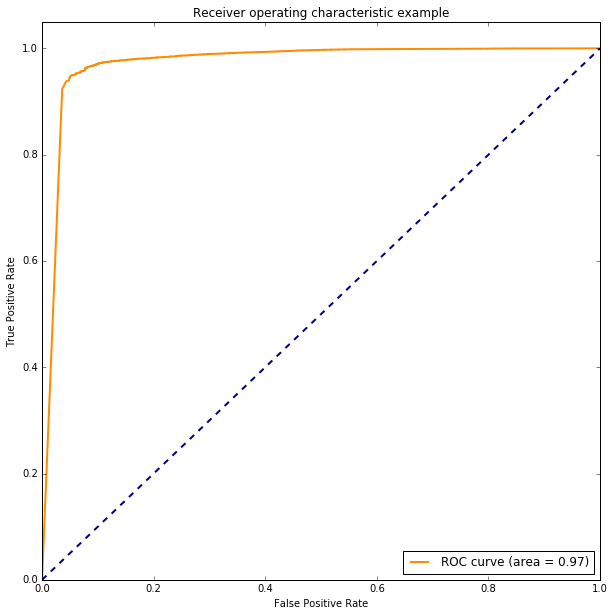

In [24]:
# mean_training
# mean_test
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# print(np.arange(1,171,1))

x_mean_training=mean_training[np.arange(1,171,1)]
y_mean_training=mean_training['class']
# print(x_mean_training)
# print(y_mean_training)
x_mean_test=mean_test[np.arange(1,171,1)]
y_mean_test=mean_test['class']

y_mean_training=y_mean_training.replace('pos', 0)
y_mean_training=y_mean_training.replace('neg',1)

y_mean_test=y_mean_test.replace("pos",0)
y_mean_test=y_mean_test.replace("neg",1)

randomforest = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0,oob_score=True)
randomforest.fit(x_mean_training, y_mean_training)
# print(randomforest.feature_importances_)
prediction_training=randomforest.predict(x_mean_training)
prediction_test=randomforest.predict(x_mean_test)
# print(prediction)
error_train = (y_mean_training!=prediction_training).sum()
mis_train_rate=error_train/len(y_mean_training)
print("misclassification for training set is:", mis_train_rate)

confusion_matrix_training_c=confusion_matrix(y_mean_training, prediction_training)
print("the confusion matrix of training is:")
print(confusion_matrix_training_c)


y_pred_rf = randomforest.predict_proba(x_mean_training)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_mean_training, y_pred_rf)
roc_auc = auc(fpr_rf,tpr_rf) 


plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

misclassification for test set is: 0.0190625
the confusion matrix of test is:
[[   71   304]
 [    1 15624]]


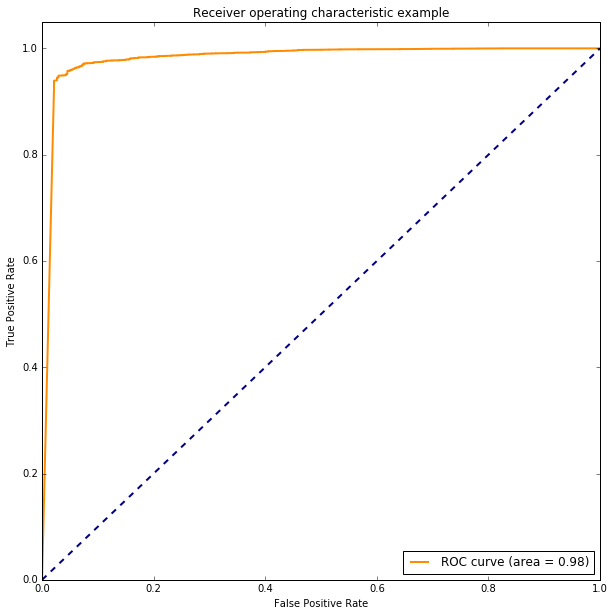

In [25]:
error_test = (y_mean_test!=prediction_test).sum()
mis_test_rate=error_test/len(y_mean_test)
print("misclassification for test set is:", mis_test_rate)

confusion_matrix_test_c=confusion_matrix(y_mean_test, prediction_test)
print("the confusion matrix of test is:")
print(confusion_matrix_test_c)


y_pred_rf = randomforest.predict_proba(x_mean_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_mean_test, y_pred_rf)
roc_auc = auc(fpr_rf,tpr_rf) 


plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [26]:
oob_error = 1 - randomforest.oob_score_
print("oob error is:",oob_error)
print("misclassification for test set is:", mis_test_rate)

oob error is: 0.014100000000000001
misclassification for test set is: 0.0190625


 ## obb error is smaller than test error

## (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

misclassification for training set is: 0.06416666666666666
the confusion matrix of training is:
[[  947    53]
 [ 3797 55203]]


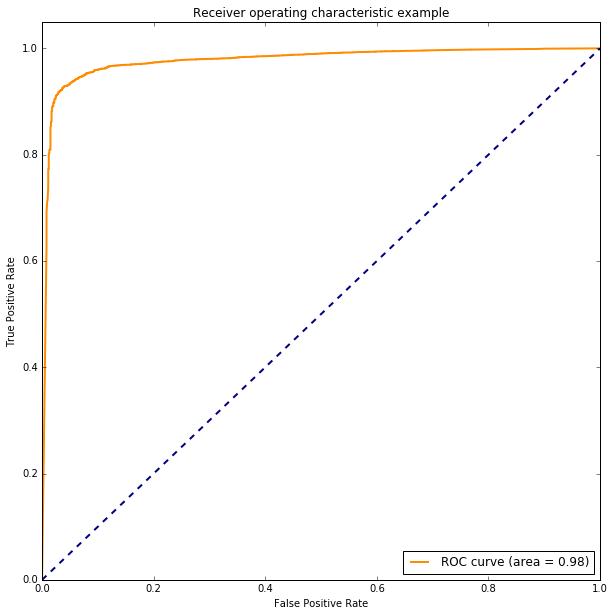

In [27]:
from sklearn.metrics import confusion_matrix

# print(y_mean_training)
randomforest_d = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0,oob_score=True,class_weight="balanced")
randomforest_d.fit(x_mean_training, y_mean_training)
# print(randomforest.feature_importances_)
prediction_training_d=randomforest_d.predict(x_mean_training)
prediction_test_d=randomforest_d.predict(x_mean_test)
# print(prediction)
error_train_d = (y_mean_training!=prediction_training_d).sum()
mis_train_rate_d=error_train_d/len(y_mean_training)
print("misclassification for training set is:", mis_train_rate_d)

confusion_matrix_training_d=confusion_matrix(y_mean_training, prediction_training_d)
print("the confusion matrix of training is:")
print(confusion_matrix_training_d)


y_pred_rf_d = randomforest_d.predict_proba(x_mean_training)[:, 1]
fpr_rf_d, tpr_rf_d, _ = roc_curve(y_mean_training, y_pred_rf_d)
roc_auc = auc(fpr_rf_d,tpr_rf_d) 


plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr_rf_d, tpr_rf_d, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

misclassification for test set is: 0.06025
the confusion matrix of test is:
[[  363    12]
 [  952 14673]]


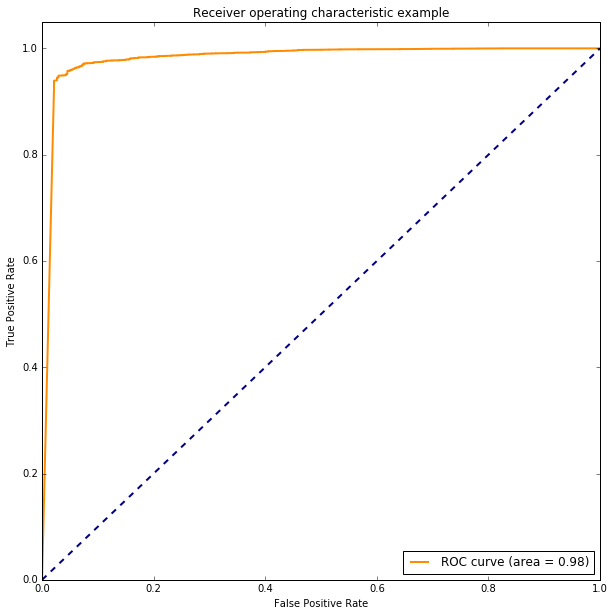

In [28]:
error_test_d = (y_mean_test!=prediction_test_d).sum()
mis_test_rate_d=error_test_d/len(y_mean_test)
print("misclassification for test set is:", mis_test_rate_d)

confusion_matrix_test_d=confusion_matrix(y_mean_test, prediction_test_d)
print("the confusion matrix of test is:")
print(confusion_matrix_test_d)


y_pred_rf_d = randomforest.predict_proba(x_mean_test)[:, 1]
fpr_rf_d, tpr_rf_d, _ = roc_curve(y_mean_test, y_pred_rf_d)
roc_auc = auc(fpr_rf_d,tpr_rf_d) 


plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr_rf_d, tpr_rf_d, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [29]:
oob_error_d = 1 - randomforest_d.oob_score_
print("oob error is:",oob_error_d)
print("misclassification for test set is:", mis_test_rate_d)
print("oob error of c is:",oob_error)
print("misclassification for test set of c is:", mis_test_rate)

oob error is: 0.06425000000000003
misclassification for test set is: 0.06025
oob error of c is: 0.014100000000000001
misclassification for test set of c is: 0.0190625


## Answer: It is obviously that the results of compensating for class imbalance is much better.

## (e) Model Trees
## In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has 􏰀j βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node. One of the methods that can be used at each node is Logistic Regression. One can use scikit learn to call Weka6 to train Logistic Model Trees for classification. Train Logistic Model Trees for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [30]:
# print(mean_training)
mean_training.to_csv("aps_failure_training_set_weka.csv", index = False, sep = ',')
mean_test.to_csv("aps_failure_test_set_weka.csv", index = False, sep = ',')

In [1]:
import weka.core.jvm


ImportError: dlopen(/Users/irischeng/anaconda3/lib/python3.6/site-packages/javabridge/_javabridge.cpython-36m-darwin.so, 2): Symbol not found: _kCFAllocatorDefault
  Referenced from: /Users/irischeng/anaconda3/lib/python3.6/site-packages/javabridge/_javabridge.cpython-36m-darwin.so
  Expected in: flat namespace
 in /Users/irischeng/anaconda3/lib/python3.6/site-packages/javabridge/_javabridge.cpython-36m-darwin.so

In [2]:
import weka.core.jvm as jvm
jvm.start()
# help(jvm.start)

ImportError: dlopen(/Users/irischeng/anaconda3/lib/python3.6/site-packages/javabridge/_javabridge.cpython-36m-darwin.so, 2): Symbol not found: _kCFAllocatorDefault
  Referenced from: /Users/irischeng/anaconda3/lib/python3.6/site-packages/javabridge/_javabridge.cpython-36m-darwin.so
  Expected in: flat namespace
 in /Users/irischeng/anaconda3/lib/python3.6/site-packages/javabridge/_javabridge.cpython-36m-darwin.so

In [5]:


import weka.core.serialization as serialization
from weka.classifiers import Classifier
from weka.core.converters import Loader

loader = Loader(classname = "weka.core.converters.CSVLoader")
wekadata_training = loader.load_file("aps_failure_training_set_weka.csv")
wekadata_test = loader.load_file("aps_failure_test_set_weka.csv")
wekadata_training.class_is_last()
wekadata_test.class_is_last()
# print type(wekadata_training)
LMT = Classifier("weka.classifiers.trees.LMT")
LMT.build_classifier(wekadata_training)
print(LMT)



ImportError: dlopen(/Users/irischeng/anaconda3/lib/python3.6/site-packages/javabridge/_javabridge.cpython-36m-darwin.so, 2): Symbol not found: _kCFAllocatorDefault
  Referenced from: /Users/irischeng/anaconda3/lib/python3.6/site-packages/javabridge/_javabridge.cpython-36m-darwin.so
  Expected in: flat namespace
 in /Users/irischeng/anaconda3/lib/python3.6/site-packages/javabridge/_javabridge.cpython-36m-darwin.so

In [6]:
from weka.classifiers import Evaluation
from weka.core.classes import Random
import weka.plot.classifiers as plcls

evaluation = Evaluation(wekadata_training)
evaluation.crossvalidate_model(LMT, wekadata_training, 5, Random(0))
print(evaluation.error_rate)
print(evaluation.confusion_matrix)
# print (evaluation.area_under_roc)

plcls.plot_roc(evaluation, class_index=[0, 1], wait=True)

ImportError: dlopen(/Users/irischeng/anaconda3/lib/python3.6/site-packages/javabridge/_javabridge.cpython-36m-darwin.so, 2): Symbol not found: _kCFAllocatorDefault
  Referenced from: /Users/irischeng/anaconda3/lib/python3.6/site-packages/javabridge/_javabridge.cpython-36m-darwin.so
  Expected in: flat namespace
 in /Users/irischeng/anaconda3/lib/python3.6/site-packages/javabridge/_javabridge.cpython-36m-darwin.so

In [ ]:
from weka.classifiers import Evaluation
from weka.core.classes import Random
import weka.plot.classifiers as plcls

evaluation = Evaluation(wekadata_training)
evaluation.crossvalidate_model(LMT, wekadata_test, 5, Random(0))
print(evaluation.error_rate)
print(evaluation.confusion_matrix)
# print (evaluation.area_under_roc)

plcls.plot_roc(evaluation, class_index=[0, 1], wait=True)

## (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train a Logistic Model Tree using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE.

In [ ]:
from imblearn.over_sampling import SMOTE
# print(y_mean_training)
smote = SMOTE(random_state=2)
x_mean_training_smote, y_mean_training_smote= smote.fit_sample(x_mean_training, mean_training['class'])
x_mean_training_smote=pd.DataFrame(x_mean_training_smote)
y_mean_training_smote=pd.DataFrame(y_mean_training_smote)
all_mean_training_smote=x_mean_training_smote

all_mean_training_smote['class']=y_mean_training_smote

all_mean_training_smote.to_csv("aps_failure_training_set_weka_smote.csv", index = False, sep = ',')

In [ ]:
import weka.core.jvm as jvm
jvm.start()


import weka.core.serialization as serialization
from weka.classifiers import Classifier
from weka.core.converters import Loader

loader = Loader(classname = "weka.core.converters.CSVLoader")
wekadata_training = loader.load_file("aps_failure_training_set_weka_smote.csv")
wekadata_test = loader.load_file("aps_failure_test_set_weka.csv")
wekadata_training.class_is_last()
wekadata_test.class_is_last()
# print type(wekadata_training)
LMT = Classifier("weka.classifiers.trees.LMT")
LMT.build_classifier(wekadata_training)
print(LMT)



In [ ]:
from weka.classifiers import Evaluation
from weka.core.classes import Random
import weka.plot.classifiers as plcls

evaluation = Evaluation(wekadata_training)
evaluation.crossvalidate_model(LMT, wekadata_training, 5, Random(0))
print(evaluation.error_rate)

print(evaluation.confusion_matrix)
# print (evaluation.area_under_roc)

plcls.plot_roc(evaluation, class_index=[0, 1], wait=True)

In [ ]:
from weka.classifiers import Evaluation
from weka.core.classes import Random
import weka.plot.classifiers as plcls

evaluation = Evaluation(wekadata_training)
evaluation.crossvalidate_model(LMT, wekadata_test, 5, Random(0))
print(evaluation.error_rate)
print(evaluation.confusion_matrix)
# print (evaluation.area_under_roc)

plcls.plot_roc(evaluation, class_index=[0, 1], wait=True)

## ISLR 6.8.3

### (a)  
#### (iv) Steadily decreases: As we increase s from 0, all β 's increase from 0 to their least square estimate values. Training error for 0 β s is the maximum and it steadily decreases to the Ordinary Least Square RSS

### (b)
#### (ii) Decrease initially, and then eventually start increasing in a U shape: When s=0, all β s are 0, the model is extremely simple and has a high test RSS. As we increase s, beta s assume non-zero values and model starts fitting well on test data and so test RSS decreases. Eventually, as beta s approach their full blown OLS values, they start overfitting to the training data, increasing test RSS.

### (c)
#### (iii) Steadily increase: When s=0, the model effectively predicts a constant and has almost no variance. As we increase s, the models includes more β s and their values start increasing. At this point, the values of β s become highly dependent on training data, thus increasing the variance.

### (d)
#### (iv) Steadily decrease: When s=0, the model effectively predicts a constant and hence the prediction is far from actual value. Thus bias is high. As s increases, more β s become non-zero and thus the model continues to fit training data better. And thus, bias decreases.

### (e)
#### (v) Remains constant: By definition, irreducible error is model independent and hence irrespective of the choice of s, remains constant.

## ISLR 6.8.5

### Shown in the handwritting paper

## ISLR 8.4.5

### With the majority vote approach, we classify X as Red as it is the most commonly occurring class among the 10 predictions (6 for Red vs 4 for Green). 
### With the average probability approach, we classify X as Green as the average of the 10 probabilities is 0.45. ((0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.75)/10=0.45)

## ISLR 9.7.3

In [ ]:
import matplotlib.pyplot as plt
x=[0,5]
y=[-0.5,4.5]
x1 = [3, 2, 4, 1]
y1 = [4, 2, 4, 4]
x2 = [2, 4, 4]
y2 = [1, 3, 1]
x_red=[0,5]
y_red=[0,5]
x_blue=[0,5]
y_blue=[-1,4]

p1=plt.scatter(x1,y1,color='r',label='1',s=30)
p2=plt.scatter(x2,y2,color='b',label='2',s=30)
plt.plot(x,y)
plt.plot(x_red,y_red)
plt.plot(x_blue,y_blue)
plt.plot([4,4],[3,4])
plt.plot([2,2],[1,2])
plt.show()
# plt.legend(loc ='upper right')
plt.show()


## (c) 0.5−X1+X2>0 classify to red, 0.5-X1+X2<0 classify to blue 

## (e) The support vectors are the points (2,1), (2,2), (4,3) and (4,4).

## (f) A slight movement of observation #7 (4,1) blue would not have an effect on the maximal margin hyperplane since its movement would be outside of the margin.

## (g) −0.8−X1+X2>0

In [ ]:
import matplotlib.pyplot as plt
x=[0,5]
y=[-0.8,4.2]
x1 = [3, 2, 4, 1]
y1 = [4, 2, 4, 4]
x2 = [2, 4, 4]
y2 = [1, 3, 1]

p1=plt.scatter(x1,y1,color='r',label='1',s=30)
p2=plt.scatter(x2,y2,color='b',label='2',s=30)
plt.plot(x,y)
plt.show()
# plt.legend(loc ='upper right')
plt.show()

## (h)

In [ ]:
import matplotlib.pyplot as plt

x1 = [3, 2, 4, 1, 5]
y1 = [4, 2, 4, 4, 0]
x2 = [2, 4, 4]
y2 = [1, 3, 1]

p1=plt.scatter(x1,y1,color='r',label='1',s=30)
p2=plt.scatter(x2,y2,color='b',label='2',s=30)

plt.show()
# plt.legend(loc ='upper right')
